<a href="https://colab.research.google.com/github/Gracepicharporn/Data-Science-project/blob/main/classification/SVD_Classification_appilance_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differnt method and applied SVD

## UK-DALE

### Building1

Dowload Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Image with fridge**

In [ ]:
dir = '/content/gdrive/MyDrive/data-device/SVD-fridge'

train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      validation_split = 0.2)

train_generator =train_datagen.flow_from_directory(
     dir,  # train folder
     batch_size = 64,  # define batch size
     shuffle=True,  # shuffle the train dataset
     subset = 'training',
     target_size = (224,224)

)

test_generator =train_datagen.flow_from_directory(
     dir,  # test folder
     batch_size= 1,  # define batch size (1 for test dataset)
     shuffle=True,  
     subset = 'validation',
     target_size = (224, 224)

)
                    

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2608 images belonging to 2 classes.
Found 650 images belonging to 2 classes.


In [ ]:
# shape of dataset
trainShape=train_generator.__getitem__(0)[0].shape  # train shape
testShape=test_generator.__getitem__(0)[0].shape  # test shape
print("Train Shape \n",trainShape)
print("Test Shape \n",testShape)

Train Shape 
 (64, 224, 224, 3)
Test Shape 
 (1, 224, 224, 3)


In [8]:
from tensorflow.keras.applications import VGG16  # VGG16 pre-trained model
import tensorflow as tf  # for deep learning
from tensorflow.keras import Model  # for creating a model
from sklearn.metrics import confusion_matrix, classification_report  # for calculating precision, recall, f1-score, and accuracy
import pandas as pd  # for creating a table
import numpy as np  # for calculating numeric values
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping  # for learning rate reduction and early stopping
lr_reduce = ReduceLROnPlateau(monitor='accuracy', patience=1)  # learning rate reduction
early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)  # early stopping

def pretrained_model(model):
  '''
    Create a model from a pre-trained model by adding 1 3-nodes dense layer on top
    of the model
    Input:
      model: a pre-trained model
    Output:
      a model 
  '''
  # define a pre-trained model without the top layers, and with the default weights
  pre_trained_model = model(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
  pre_trained_model.trainable = False  # freeze the weights
  pre_trained_model.summary()

  x = tf.keras.layers.Flatten()(pre_trained_model.output)  # flatten layer
  x = tf.keras.layers.Dense(2 , activation='sigmoid')(x)  # 1 3-nodes dense layer
  model = Model(pre_trained_model.input, x) 
  model.summary()

  return model

def train(model):
  '''
    train the model
    Input:
      model: a model
    Output:
      history of the training process
  '''
  # compile the model with specific configuration
  model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
  # train the model for 10 epochs and 30 steps for each epoch
  history = model.fit(train_generator, validation_data = test_generator, epochs = 50, 
                      callbacks=[lr_reduce, early_stop])
  return history

def plot_train_evaluation(history, model):
  '''
    Plot train loss and acuracy. Then, evaluate the model (precision, recall, f1-score, and accuracy) with test dataset
    Input:
      history: a history of the training process
      model: a model
    Output:
      test report (DataFrame)
  '''
  # train loss and accuracy plot
  plt.figure(figsize=(12, 8))  # define figure size
  plt.subplot(2, 2, 1)  # create a subplot
  plt.plot(history.history['val_accuracy'], label='val_accuracy') 
  plt.plot(history.history['accuracy'], label='train_accuracy') 
  plt.legend()  # plot legend
  plt.xlabel('epochs')  # define x label
  plt.title('Accuracy plot')  # define title

  plt.subplot(2, 2, 2)  # create a subplot
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.plot(history.history['loss'], label='train_loss') 
  plt.legend()  # plot legend
  plt.xlabel('epochs')  # define x label
  plt.title('Loss plot')  # define title
  plt.show()  # show all plots

  # print out average, max, and min of train accuracy and loss
  print('average train accuracy: ', sum(history.history['accuracy'])/len(history.history['accuracy']))
  print('max train accuracy: ', max(history.history['accuracy']))
  print('average train loss: ', sum(history.history['loss'])/len(history.history['loss']))
  print('min train loss: ', min(history.history['loss']))

  print('#########################################################')
  # print out average, max, and min of validation accuracy and loss
  print('average train accuracy: ', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))
  print('max train accuracy: ', max(history.history['val_accuracy']))
  print('average train loss: ', sum(history.history['val_loss'])/len(history.history['val_loss']))
  print('min train loss: ', min(history.history['val_loss']))


In [ ]:
# VGG16 pre-trained model
model1 = pretrained_model(VGG16)

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# train the model
history1 = train(model1)

Epoch 1/30
41/41 [==============================] - 1671s 41s/step - loss: 0.5835 - accuracy: 0.7220 - val_loss: 0.4608 - val_accuracy: 0.7985 - lr: 0.0010
Epoch 2/30
41/41 [==============================] - 20s 476ms/step - loss: 0.3848 - accuracy: 0.8485 - val_loss: 0.3812 - val_accuracy: 0.8323 - lr: 0.0010
Epoch 3/30
41/41 [==============================] - 21s 502ms/step - loss: 0.3085 - accuracy: 0.8949 - val_loss: 0.4267 - val_accuracy: 0.8092 - lr: 0.0010
Epoch 4/30
41/41 [==============================] - 19s 470ms/step - loss: 0.2609 - accuracy: 0.9191 - val_loss: 0.3389 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 5/30
41/41 [==============================] - 19s 468ms/step - loss: 0.2237 - accuracy: 0.9367 - val_loss: 0.3341 - val_accuracy: 0.8692 - lr: 0.0010
Epoch 6/30
41/41 [==============================] - 19s 471ms/step - loss: 0.2027 - accuracy: 0.9410 - val_loss: 0.3309 - val_accuracy: 0.8677 - lr: 0.0010
Epoch 7/30
41/41 [==============================] - 20s 482ms/st

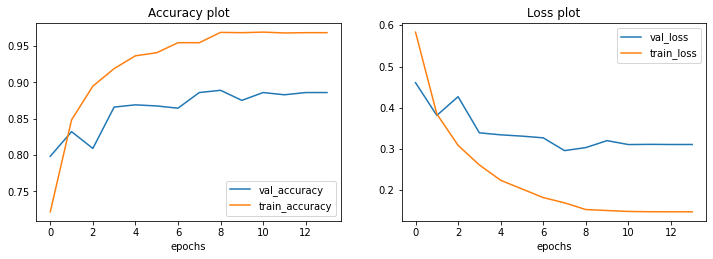

average train accuracy:  0.9274211227893829
max train accuracy:  0.9693251252174377
average train loss:  0.22909108975103923
min train loss:  0.1471313238143921
#########################################################
average train accuracy:  0.8642857032162803
max train accuracy:  0.8892307877540588
average train loss:  0.34006142403398243
min train loss:  0.29575398564338684


In [ ]:
# training and testing results
plot_train_evaluation(history1, model1)

In [ ]:
model1.save("svd_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16  
import tensorflow as tf 
from tensorflow.keras import Model  
from sklearn.metrics import confusion_matrix, classification_report  

In [ ]:
model2 = load_model('svd_model.h5')

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**Kettle**

In [ ]:
dir2 = '/content/gdrive/MyDrive/data-device/SVD-kettle'
train_datagen2 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator2 = train_datagen2.flow_from_directory(
     dir2,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [ ]:
y_predict1 = model2.evaluate(train_generator2, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 1724s 17s/step - loss: 1.8040 - accuracy: 0.3708


In [ ]:
y_predict1 

{'loss': 1.8040313720703125, 'accuracy': 0.3707796335220337}

In [ ]:
model3 = load_model('/content/gdrive/MyDrive/data-device/model/svd_model.h5')

**Washer Dryer**

In [ ]:
dir3 = '/content/gdrive/MyDrive/data-device/SVD-washer'
train_datagen3 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator3 = train_datagen3.flow_from_directory(
     dir3,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [ ]:
y_predict2 = model3.evaluate(train_generator3, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 1728s 17s/step - loss: 0.1861 - accuracy: 0.9484


In [ ]:
y_predict2

{'loss': 0.18607915937900543, 'accuracy': 0.9484346508979797}

### Across building

**fridge**

In [ ]:
dir4 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/SVD-across-house/train-fridge-SVD'
train_datagen4 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator4 = train_datagen4.flow_from_directory(
     dir4,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 3258 images belonging to 2 classes.


In [ ]:
y_predict4 = model3.evaluate(train_generator4, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 1120s 11s/step - loss: 0.1760 - accuracy: 0.9475


In [ ]:
y_predict4

{'loss': 0.1759519726037979, 'accuracy': 0.9475138187408447}

**Retain fridge**

In [9]:
dir = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/SVD-across-house/train-fridge-SVD'

train_datagen = ImageDataGenerator(
      samplewise_std_normalization= True,
      validation_split = 0.2)

train_generator =train_datagen.flow_from_directory(
     dir,  # train folder
     batch_size = 64,  # define batch size
     shuffle=True,  # shuffle the train dataset
     subset = 'training',
     target_size = (224,224)

)

test_generator =train_datagen.flow_from_directory(
     dir,  # test folder
     batch_size= 1,  # define batch size (1 for test dataset)
     shuffle=True,  
     subset = 'validation',
     target_size = (224, 224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2608 images belonging to 2 classes.
Found 650 images belonging to 2 classes.


In [6]:
model1_retain = pretrained_model(VGG16)

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [10]:
history1_retain = train(model1_retain)

Epoch 1/50
41/41 [==============================] - 1202s 29s/step - loss: 0.5807 - accuracy: 0.6933 - val_loss: 0.3800 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 2/50
41/41 [==============================] - 19s 464ms/step - loss: 0.3176 - accuracy: 0.8846 - val_loss: 0.2858 - val_accuracy: 0.8954 - lr: 0.0010
Epoch 3/50
41/41 [==============================] - 19s 465ms/step - loss: 0.2448 - accuracy: 0.9245 - val_loss: 0.2511 - val_accuracy: 0.9046 - lr: 0.0010
Epoch 4/50
41/41 [==============================] - 19s 468ms/step - loss: 0.2015 - accuracy: 0.9456 - val_loss: 0.2245 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 5/50
41/41 [==============================] - 19s 469ms/step - loss: 0.1711 - accuracy: 0.9567 - val_loss: 0.2181 - val_accuracy: 0.9231 - lr: 0.0010
Epoch 6/50
41/41 [==============================] - 19s 466ms/step - loss: 0.1538 - accuracy: 0.9586 - val_loss: 0.2042 - val_accuracy: 0.9231 - lr: 0.0010
Epoch 7/50
41/41 [==============================] - 19s 472ms/st

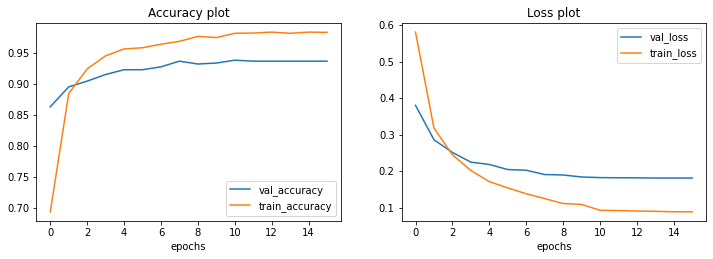

average train accuracy:  0.9466305673122406
max train accuracy:  0.9838957190513611
average train loss:  0.16831729654222727
min train loss:  0.08835001289844513
#########################################################
average train accuracy:  0.9236538521945477
max train accuracy:  0.9384615421295166
average train loss:  0.21358941681683064
min train loss:  0.18089045584201813


In [11]:
plot_train_evaluation(history1_retain, model1_retain )

In [12]:
model1_retain.save("/content/gdrive/MyDrive/data-device/model/UK-DALE/diff/SVD-acrosshouse.h5")

**Kettle**

In [13]:
dir5 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/SVD-across-house/train-kettle-SVD'
train_datagen5 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator5 = train_datagen5.flow_from_directory(
     dir5,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [ ]:
y_predict5 = model3.evaluate(train_generator5, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 1714s 17s/step - loss: 0.9267 - accuracy: 0.6074


In [ ]:
y_predict5

{'loss': 0.9267085790634155, 'accuracy': 0.6074278950691223}

**Retrain Kettle**

In [14]:
y_predict5_reatin = model1_retain.evaluate(train_generator5, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 617s 6s/step - loss: 1.0574 - accuracy: 0.5952


In [16]:
y_predict5_reatin

{'loss': 1.0574051141738892, 'accuracy': 0.5951504111289978}

**Washer Dryer**

In [15]:
dir6 = '/content/gdrive/MyDrive/data-device/UK-DALE-data/diff/SVD-across-house/train-washer-SVD'
train_datagen6 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator6 = train_datagen6.flow_from_directory(
     dir6,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 3258 images belonging to 2 classes.


In [ ]:
y_predict6 = model3.evaluate(train_generator6, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 1722s 17s/step - loss: 0.1916 - accuracy: 0.9454


In [ ]:
y_predict6

{'loss': 0.19160981476306915, 'accuracy': 0.9453652501106262}

Retain washer dryer

In [17]:
y_predict6_reatin = model1_retain.evaluate(train_generator6, return_dict = True, use_multiprocessing= True)

102/102 [==============================] - 360s 4s/step - loss: 0.3206 - accuracy: 0.8554


In [18]:
y_predict6_reatin 

{'loss': 0.3205863833427429, 'accuracy': 0.8554328083992004}

## REDD

### Building 1

**fridge**

In [ ]:
dir7 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/buildind1-SVD/train-fridge-svd'
train_datagen7 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator7 = train_datagen7.flow_from_directory(
     dir7,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict7 = model3.evaluate(train_generator7, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 43s 11s/step - loss: 1.8501 - accuracy: 0.4861


In [ ]:
y_predict7 

{'loss': 1.8501497507095337, 'accuracy': 0.4861111044883728}

**Microwave**

In [ ]:
dir8 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/buildind1-SVD/train-microwave-svd'
train_datagen8 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator8 = train_datagen8.flow_from_directory(
     dir8,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict8 = model3.evaluate(train_generator8, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 43s 11s/step - loss: 1.8346 - accuracy: 0.4861


In [ ]:
y_predict8 

{'loss': 1.8345646858215332, 'accuracy': 0.4861111044883728}

**Washer Dryer**

In [ ]:
dir9 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/buildind1-SVD/train-washer-svd'
train_datagen9 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator9 = train_datagen9.flow_from_directory(
     dir9,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict9 = model3.evaluate(train_generator9, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 39s 10s/step - loss: 1.8238 - accuracy: 0.5000


In [ ]:
y_predict9 

{'loss': 1.8238177299499512, 'accuracy': 0.5}

### Across builindg

**Fridge**

In [19]:
dir10 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg-SVD/SVD-train_fridge'
train_datagen10 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator10 = train_datagen10.flow_from_directory(
     dir10,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 72 images belonging to 2 classes.


In [ ]:
y_predict10 = model3.evaluate(train_generator10, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 41s 11s/step - loss: 1.8577 - accuracy: 0.4722


In [ ]:
y_predict10

{'loss': 1.8577371835708618, 'accuracy': 0.4722222089767456}

**Retain fridge**

In [20]:
y_predict7_reatin = model1_retain.evaluate(train_generator10, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 14s 7s/step - loss: 2.0509 - accuracy: 0.4722


In [21]:
y_predict7_reatin 

{'loss': 2.050891637802124, 'accuracy': 0.4722222089767456}

**Microwave**

In [22]:
dir11 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg-SVD/SVD-train_microwave'
train_datagen11 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator11 = train_datagen11.flow_from_directory(
     dir11,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict11 = model3.evaluate(train_generator11, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 40s 10s/step - loss: 1.8427 - accuracy: 0.4583


In [ ]:
y_predict11

{'loss': 1.8427423238754272, 'accuracy': 0.4583333432674408}

Retrain Microwave

In [23]:
y_predict8_reatin = model1_retain.evaluate(train_generator11, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 11s 5s/step - loss: 1.9951 - accuracy: 0.5000


In [24]:
y_predict8_reatin 

{'loss': 1.9951128959655762, 'accuracy': 0.5}

**Washer Dryer**

In [25]:
dir12 = '/content/gdrive/MyDrive/data-device/REDD-data/diff/across-builg-SVD/SVD-train_washer'
train_datagen12 = ImageDataGenerator(
      samplewise_std_normalization= True,
      )

train_generator12 = train_datagen12.flow_from_directory(
     dir12,  # train folder
     shuffle=True,  # shuffle the train dataset
     target_size = (224,224)

)

Found 72 images belonging to 2 classes.


In [ ]:
y_predict12 = model3.evaluate(train_generator12, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 41s 11s/step - loss: 1.8386 - accuracy: 0.4722


In [ ]:
y_predict12

{'loss': 1.838561773300171, 'accuracy': 0.4722222089767456}

**Retrain Washer Dryer**

In [26]:
y_predict9_reatin = model1_retain.evaluate(train_generator12, return_dict = True, use_multiprocessing= True)

3/3 [==============================] - 10s 5s/step - loss: 1.9943 - accuracy: 0.5139


In [27]:
y_predict9_reatin

{'loss': 1.9942970275878906, 'accuracy': 0.5138888955116272}